In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,PrecisionRecallDisplay
import xgboost as xgb

In [2]:
df=pd.read_csv('../datasets/Churn_Modelling.csv',index_col=False)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.columns

In [15]:
for col in df.columns:
    print(df[col].value_counts())

2049    1
8865    1
6806    1
4759    1
8857    1
       ..
9526    1
5432    1
7481    1
1338    1
2047    1
Name: RowNumber, Length: 10000, dtype: int64
15695872    1
15801062    1
15682268    1
15647453    1
15684319    1
           ..
15629677    1
15773039    1
15766896    1
15719793    1
15812607    1
Name: CustomerId, Length: 10000, dtype: int64
Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Nevels        1
Lavarack      1
Frederick     1
Slattery      1
Spyer         1
Name: Surname, Length: 2932, dtype: int64
850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: CreditScore, Length: 460, dtype: int64
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Lengt

In [17]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

In [16]:
df['NumOfProducts'].describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

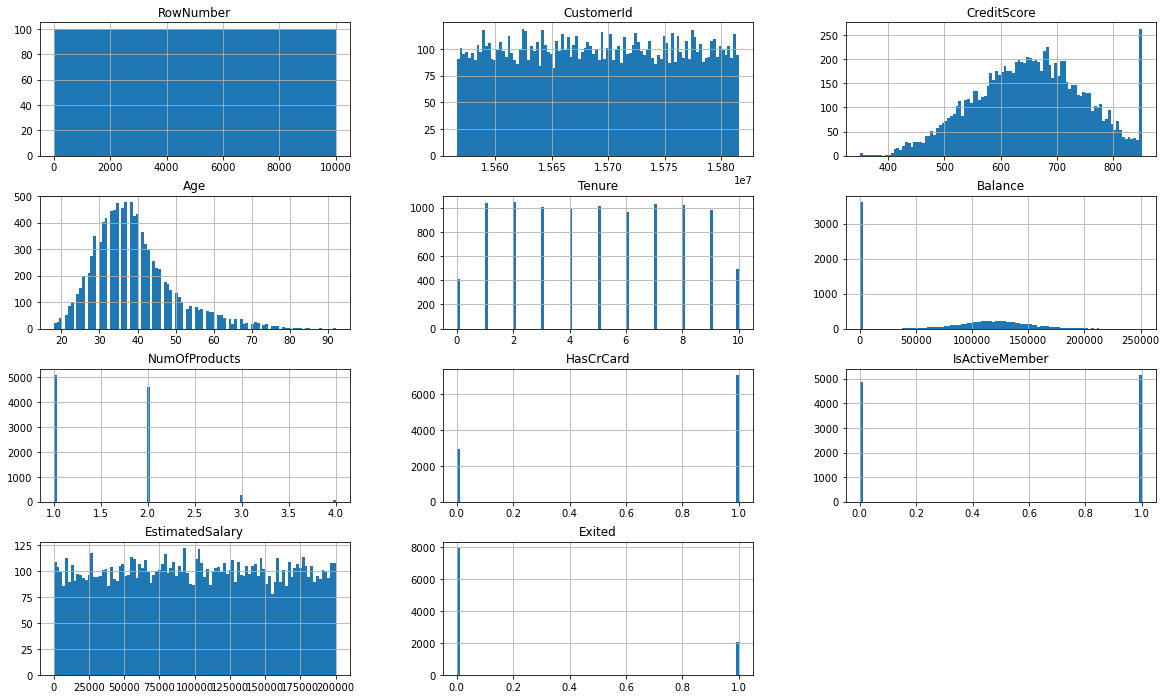

In [4]:
df.hist(figsize=(20,12),bins=100)

In [ ]:
df_churn=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [ ]:
df_churn.describe()

In [5]:
sns.countplot(x='Exited',hue='Gender',data=df_churn)

NameError: name 'df_churn' is not defined

In [ ]:
corr=df_churn.corr()

In [ ]:
f,ax=plt.subplots(figsize=(20,12))
sns.heatmap(corr,vmax=0.8,annot=True,cmap='Blues')

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(411)
sns.countplot(x='HasCrCard',hue='Exited',data=df_churn)

plt.subplot(412)
sns.countplot(x='IsActiveMember',hue='Exited',data=df_churn)
plt.subplot(413)
sns.countplot(x='Tenure',hue='Exited',data=df_churn)

In [ ]:
plt.figure(figsize=(20,12))
sns.countplot(x='Geography',hue='Exited',data=df_churn)

In [ ]:
plt.figure(figsize=(20,12))
sns.kdeplot(df_churn[df_churn['Exited']==1]['EstimatedSalary'],label='Exited',color='r',shade=True)
sns.kdeplot(df_churn[df_churn['Exited']==0]['EstimatedSalary'],label='Stayed',color='b',shade=True)

plt.xlabel('EstimatedSalary')

### Feature Engineering

In [ ]:
df_churn.info()

1.toarray returns an ndarray from a sparse matrix

In [ ]:
#We can use OneHotEncoder to transform categorical variables into numerical variables.
onehot=OneHotEncoder()
X_number=df_churn.drop(['Geography','Gender'],axis=1)
X_category=onehot.fit_transform(df_churn[['Geography','Gender']]).toarray()
X_cat=pd.DataFrame(X_category)

In [ ]:
X_all=pd.concat([X_cat,X_number],axis=1)

In [ ]:
X_all.head()

In [ ]:
#split the dataset
y=df_churn['Exited']
X_all=X_all.drop(['Exited'],axis=1)

In [ ]:
scaler=MinMaxScaler()
X_all_scaled=scaler.fit_transform(X_all)

In [ ]:
X_all_scaled

In [ ]:
#splitting the X_all 
X_train,X_test,y_train,y_test=train_test_split(X_all_scaled,y,test_size=0.3,random_state=0)

In [ ]:
y_test.shape

In [ ]:
#Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [ ]:
print('Accuracy for the logistic regression is : {:.2f}%'.format(100* accuracy_score(y_test,y_pred)))

In [ ]:
#confusion matrix heatmap
con_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(con_matrix,annot=True)

In [133]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.76      0.51      0.61       621

    accuracy                           0.87      3000
   macro avg       0.82      0.74      0.77      3000
weighted avg       0.86      0.87      0.86      3000



### RandomForest Classification HyperParameter Tuning

In [ ]:
## We can try with another model
# Random Forest
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [ ]:
#confusion matrix heatmap
con_matrix=confusion_matrix(y_test,y_pred)
sns.heatmap(con_matrix,annot=True)

In [135]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.76      0.51      0.61       621

    accuracy                           0.87      3000
   macro avg       0.82      0.74      0.77      3000
weighted avg       0.86      0.87      0.86      3000



In [ ]:
print('Accuracy for the Random Forest Classifier is : {:.2f}%'.format(100* accuracy_score(y_test,y_pred)))

#### Using Scikit-Learn’s RandomizedSearchCV method, we can define a grid of hyperparameter ranges, and randomly sample from the grid, performing K-Fold CV with each combination of values.

In [ ]:
from pprint import pprint
rf=RandomForestClassifier(random_state=42)

pprint(rf.get_params())

In [ ]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

n_estimators=[int(x) for x in np.linspace(start=0,stop=1000,num=10)]
max_features=['sqrt','log2']
max_depth=[int(x) for x in np.linspace(start=10,stop=110,num=11)]
max_depth.append(None)
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
bootstrap=[True,False]

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap
}
pprint(random_grid)

In [ ]:
rf_new=RandomForestClassifier()
rf_random=RandomizedSearchCV(estimator=rf_new,param_distributions=random_grid,n_iter=100,cv=3,random_state=42)

In [ ]:
rf_random.fit(X_train,y_train)

In [ ]:
best_params=rf_random.best_params_

In [ ]:
best_params

In [ ]:
rfc = RandomForestClassifier(n_estimators = 111,min_samples_split=5,min_samples_leaf=1,max_features='log2',max_depth=30,bootstrap=True, random_state = 0)
rfc.fit(X_train, y_train)

y_predc = rfc.predict(X_test)


In [ ]:
print('Accuracy for the Random Forest Classifier is : {:.2f}%'.format(100* accuracy_score(y_test,y_predc)))

### XGBoost Classifier

In [127]:
model=xgb.XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [129]:
pred_xgb=model.predict(X_test)

In [130]:
## Evaluation of thais model
print('Accuracy of XGBoost classifier on test set: {:.2f}%'.format(100* accuracy_score(y_test, pred_xgb)))

Accuracy of XGBoost classifier on test set: 86.00%


<AxesSubplot:>

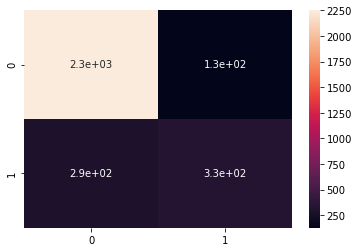

In [131]:
cm=confusion_matrix(y_test,pred_xgb)
sns.heatmap(cm,annot=True)

In [132]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.95      0.91      2379
           1       0.72      0.53      0.61       621

    accuracy                           0.86      3000
   macro avg       0.80      0.74      0.76      3000
weighted avg       0.85      0.86      0.85      3000



| This | is   |
|------|------|
|   a  | table|

|Value | Model | Precision | Recall | F1-score|
|------|------|------|------|------|
|0| Logistic Regression |0.88| 0.96 |0.92|
|1|  Logistic Regression| 0.76|0.51  |   0.61|
|0| RandomForestClassifier|0.88 |0.96  |0.92|
|1| RandomForestClassifier|0.76 |0.51  |0.61|
|0| RandomForestClassifier|0.88 |0.96  |0.92|
|0| XGBoost Classifier|0.89 |0.95  |0.91|
|1| XGBoost Classifier|0.72|0.53   |   0.61

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [139]:
df_churn2=pd.read_csv('datasets/Churn_Modelling.csv',index_col=False)
df_churn2=df_churn2.drop(['RowNumber','CustomerId','Surname'],axis=1)

categorical=['Geography','Gender']
numerical=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard', 'IsActiveMember', 'EstimatedSalary']

df_train_all,df_test=train_test_split(df_churn2,test_size=0.3,random_state=0)

y_train_all=df_train_all.Exited.astype(int).values
y_test=df_test.Exited.astype(int).values

df_train,df_val=train_test_split(df_train_all,test_size=0.3,random_state=0)
y_train=df_train.Exited.astype(int).values
y_val=df_val.Exited.astype(int).values

##Use Dict Vectorizer to transform categorical variables into numerical variables

# The class DictVectorizer can be used to convert feature arrays represented as lists of standard 
# Python dict objects to the NumPy/SciPy representation used by scikit-learn estimators.

train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')

dv=DictVectorizer()
X_train=dv.fit_transform(train_dicts)

In [144]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [156]:
val_dicts=df_val[categorical+numerical].to_dict(orient='records')
X_val=dv.transform(val_dicts)
y_pred = rf.predict_proba(X_val)[:,1]

In [157]:
y_pred

array([0.03, 0.  , 0.47, ..., 0.53, 0.19, 0.08])

In [158]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.842737449589765

In [161]:
from sklearn.pipeline import make_pipeline

pipeline=make_pipeline(
DictVectorizer(),RandomForestClassifier(n_estimators=100,random_state=0)
)
pipeline.fit(train_dicts,y_train)

Pipeline(steps=[('dictvectorizer', DictVectorizer()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=0))])

In [164]:
y_pred=pipeline.predict_proba(val_dicts)[:,1]

roc_auc_score(y_val,y_pred)

0.842737449589765

### Saving the model


In [168]:
import pickle
with open('models/pipeline.bin','wb') as f:
    pickle.dump(pipeline,f)

### Testing out the model


In [176]:
customer = {'CreditScore': 597,
 'Geography': 'Germany',
 'Gender': 'Female',
 'Age': 35,
 'Tenure': 8,
 'Balance': 131101.04,
 'NumOfProducts': 1,
 'HasCrCard': 1,
 'IsActiveMember': 1,
 'EstimatedSalary': 192852.67,
 'Exited': 0}

In [177]:
customer

{'CreditScore': 597,
 'Geography': 'Germany',
 'Gender': 'Female',
 'Age': 35,
 'Tenure': 8,
 'Balance': 131101.04,
 'NumOfProducts': 1,
 'HasCrCard': 1,
 'IsActiveMember': 1,
 'EstimatedSalary': 192852.67,
 'Exited': 0}

In [179]:
pipeline.predict_proba(customer)[0,1]

0.4